<a href="https://colab.research.google.com/github/antoniogss/chemometrics_project/blob/main/projetoFinalMQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Módulos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import google.colab as gc
import webbrowser as wb
import warnings

warnings.filterwarnings('ignore')

# Will make your plot outputs appear and be stored within the notebook
%matplotlib inline 

## Conexão com o Google Drive

In [2]:
gc.drive.mount('./gdrive/', force_remount=True)
gc.output.clear()

#Obs: qd ocorrer o erro "no107" no download de figuras, reexecutar este código!

##Criação de diretórios no Google Drive

In [3]:
# Criação do diretório projetoFinalMQ no Google Drive institucional do discente
#%mkdir "./gdrive/MyDrive/projetoFinalMQ/"
%cd ./gdrive/MyDrive/projetoFinalMQ/
gc.output.clear()
%pwd

'/content/gdrive/MyDrive/projetoFinalMQ'

In [4]:
# Criação do subdiretório bancoDados 
#%mkdir  "./bancoDados/"
%cd ./bancoDados/
gc.output.clear()
%pwd

'/content/gdrive/MyDrive/projetoFinalMQ/bancoDados'

In [5]:
# Criação do diretório figuras no diretório projetoFinalMQ 
# %cd ..
# %mkdir "./figuras/"
# %cd ./figuras/
# %cd ..
# gc.output.clear()
# %pwd
# %ls -l | grep "^d" #This command lists only directories in the current path

In [6]:
#%cd ./bancoDados/ #Current directory
#gc.output.clear()
#%pwd

## Download dos bancos de dados

In [7]:
urlTinto = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

urlBranco = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

In [8]:
# Command-line utility for downloading files from the web
#!wget $urlTinto $urlBranco 
gc.output.clear()
%ls *.csv

dadosBranco.csv      pivotUnificada2.csv   winequality-red.csv
dadosTinto.csv       pivotUnificada.csv    winequality-white.csv
dadosUnificados.csv  tendenciaCentral.csv


# Pré-visualização e análises preliminares

In [9]:
dadosTinto = pd.read_csv("./winequality-red.csv", sep= ';')

dadosBranco = pd.read_csv("./winequality-white.csv", sep= ';')

In [10]:
print("Banco de dados: vinho tinto")

dadosTinto.head()

Banco de dados: vinho tinto


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
print("Vinho tinto: medidas de tendência central")

dadosTinto.describe()

Vinho tinto: medidas de tendência central


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
print("Banco de dados: vinho branco")

dadosBranco.head()

Banco de dados: vinho branco


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
print("Vinho branco: medidas de tendência central")

dadosBranco.describe()

Vinho branco: medidas de tendência central


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Tabela Dinâmica

In [14]:
#@title
pivot1 = pd.pivot_table(
                        dadosTinto, 
                        index = 'quality',
                        values = [
                                  'citric acid', 
                                  'fixed acidity', 
                                  'volatile acidity',
                                  'pH',
                                  'alcohol', 
                                  'residual sugar'
                               ],
                        aggfunc='mean'
)

# Multi-line Print
print(''' 

===================================
|Características do vinho Tinto:  |
|                                 |
|      @ Ácido cítrico            |
|      @ Acidez fixa              |
|      @ Acidez volátil           |
|      @ pH                       |
|      @ Teor alcoólico           |
|      @ Açúcar residual          |
===================================

''')

pivot1  

 

|Características do vinho Tinto:  |
|                                 |
|      @ Ácido cítrico            |
|      @ Acidez fixa              |
|      @ Acidez volátil           |
|      @ pH                       |
|      @ Teor alcoólico           |
|      @ Açúcar residual          |




,alcohol,citric acid,fixed acidity,pH,residual sugar,volatile acidity
quality,,,,,,
3,9.955000,0.171000,8.360000,3.398000,2.635000,0.884500
4,10.265094,0.174151,7.779245,3.381509,2.694340,0.693962
5,9.899706,0.243686,8.167254,3.304949,2.528855,0.577041
6,10.629519,0.273824,8.347179,3.318072,2.477194,0.497484
7,11.465913,0.375176,8.872362,3.290754,2.720603,0.403920
8,12.094444,0.391111,8.566667,3.267222,2.577778,0.423333


In [15]:
#@title
pivot2 = pd.pivot_table(
                        dadosBranco, 
                        index = 'quality',
                        values = [
                                  'citric acid', 
                                  'fixed acidity', 
                                  'volatile acidity',
                                  'pH',
                                  'alcohol', 
                                  'residual sugar'
                               ],
                        aggfunc='mean'
)

print('''

===================================
|Características do vinho Branco: |
|                                 |
|      @ Ácido cítrico            |
|      @ Acidez fixa              |
|      @ Acidez volátil           |
|      @ pH                       |
|      @ Teor alcoólico           |
|      @ Açúcar residual          |
===================================

''')

pivot2  



|Características do vinho Branco: |
|                                 |
|      @ Ácido cítrico            |
|      @ Acidez fixa              |
|      @ Acidez volátil           |
|      @ pH                       |
|      @ Teor alcoólico           |
|      @ Açúcar residual          |




,alcohol,citric acid,fixed acidity,pH,residual sugar,volatile acidity
quality,,,,,,
3,10.345000,0.336000,7.600000,3.187500,6.392500,0.333250
4,10.152454,0.304233,7.129448,3.182883,4.628221,0.381227
5,9.808840,0.337653,6.933974,3.168833,7.334969,0.302011
6,10.575372,0.338025,6.837671,3.188599,6.441606,0.260564
7,11.367936,0.325625,6.734716,3.213898,5.186477,0.262767
8,11.636000,0.326514,6.657143,3.218686,5.671429,0.277400
9,12.180000,0.386000,7.420000,3.308000,4.120000,0.298000


## Preparação de bancos de dados binários

In [16]:
dadosTinto['Type'] = "Red"

# Conditionals [IF / ELSE] in Pandas - create columns based on conditions
dadosTinto['Rating'] = ["Good" if i >=7 else "Bad" for i in dadosTinto.quality]

dadosTinto.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,Rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red,Bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,Bad


In [17]:
print('dadosTinto: (Linhas, Colunas) =', dadosTinto.shape)

dadosTinto: (Linhas, Colunas) = (1599, 14)


In [18]:
# Exportação do banco de dados 
dadosTinto.to_csv('./dadosTinto.csv')

In [19]:
dadosBranco['Type'] = "White"

# Conditionals [IF / ELSE] in Pandas - create columns based on conditions
dadosBranco['Rating'] = ["Good" if i >=7 else "Bad" for i in dadosBranco.quality]

dadosBranco.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,Rating
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White,Bad
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White,Bad
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White,Bad
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,Bad
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,Bad


In [20]:
print('dadosBranco: (Linhas, Colunas) =', dadosBranco.shape)

dadosBranco: (Linhas, Colunas) = (4898, 14)


In [21]:
# Exportação do banco de dados 
dadosBranco.to_csv('./dadosBranco.csv')

In [22]:
# Stacking dataframes on the top of each other
# axis = 1 Stacking side-by-side
dadosUnificados = pd.concat([dadosTinto, dadosBranco], ignore_index = True)

dadosUnificados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,Rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red,Bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,Bad


In [23]:
print("Banco de Dados Unificado: medidas de tendência central")

dadosUnificados.describe()

#dadosUnificados.describe(include = 'all')

Banco de Dados Unificado: medidas de tendência central


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [24]:
# Exportação do banco de dados

tendenciaCentral = dadosUnificados.describe()
 
tendenciaCentral.to_csv('./tendenciaCentral.csv')

In [25]:
print('dadosUnificados: (Linhas, Colunas) =', dadosUnificados.shape)

dadosUnificados: (Linhas, Colunas) = (6497, 14)


In [26]:
# Exportação do banco de dados 
dadosUnificados.to_csv('./dadosUnificados.csv')

## Tabela Dinâmica dos dados unificados 

In [27]:
pivotUnificada = pd.pivot_table(
                                  dadosUnificados, 
                                  index = 'Type',
                                  values = [
                                            'volatile acidity',
                                            'alcohol', 
                                            'residual sugar'
                                        ],
                                  columns = 'Rating',
                                  aggfunc='mean'
)

pivotUnificada

alcohol            residual sugar           volatile acidity  \
Rating        Bad       Good            Bad      Good              Bad   
Type                                                                     
Red     10.251037  11.518049       2.512120  2.708756         0.547022   
White   10.265215  11.416022       6.703478  5.261509         0.281802   

                  
Rating      Good  
Type              
Red     0.405530  
White   0.265349

In [28]:
# Exportação do banco de dados 
pivotUnificada.to_csv('./pivotUnificada.csv')

## Tabela Dinâmica Interativa (PivotTableJS)

In [29]:
!pip install pivottablejs

from pivottablejs import pivot_ui

gc.output.clear()

In [30]:
from IPython.display import HTML

pivot_ui(dadosUnificados, outfile_path='pivottablejs.html')

HTML('pivottablejs.html')

# Análise exploratória de dados

In [31]:
print("Banco de dados: vinho tinto")

dadosTinto.info()

Banco de dados: vinho tinto
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  Type                  1599 non-null   object 
 13  Rating                1599 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory u

In [32]:
print("Banco de dados: vinho tinto")

dadosTinto.isnull().sum()

Banco de dados: vinho tinto


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
Rating                  0
dtype: int64

In [33]:
print("Banco de dados: vinho branco")

dadosBranco.info()

Banco de dados: vinho branco
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  Type                  4898 non-null   object 
 13  Rating                4898 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory 

In [34]:
print("Banco de dados: vinho branco")

dadosBranco.isnull().sum()

Banco de dados: vinho branco


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
Rating                  0
dtype: int64

## Remoção de "Outliers": Vinho Tinto




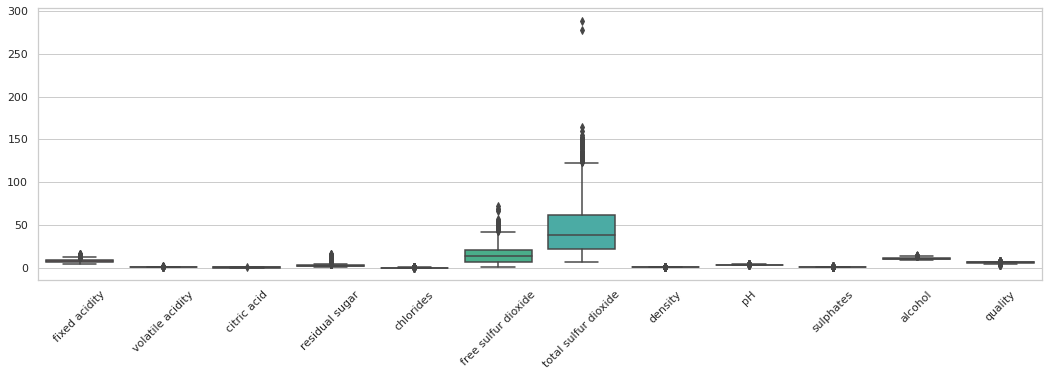

In [35]:
# Vinho tinto: panorama geral
sns.set(style='whitegrid')

fig,ax = plt.subplots(1, figsize=(18,5))

ax = sns.boxplot(data=dadosTinto)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# plt.title(
#             'Gáfico Boxplot: Vinho Tinto',
#             fontsize = 14
# )

#plt.show()

plt.savefig(
              '/content/gdrive/MyDrive/projetoFinalMQ/figuras/bpGeralTinto.png',
              transparent = True,
              bbox_inches = 'tight'       
)

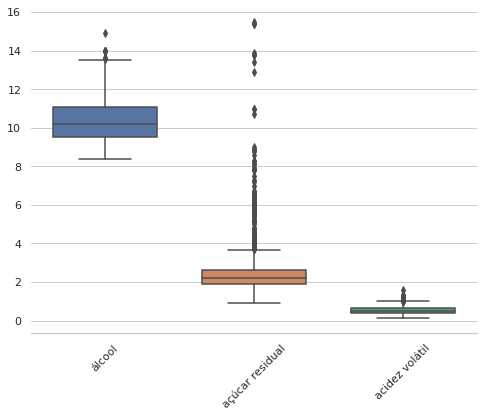

In [36]:
# Gráfico Boxplot: Vinho Branco

# set style
sns.set(style='whitegrid')

fig,ax = plt.subplots(1, figsize=(8,6))

ax = sns.boxplot(data=dadosTinto[[
                                  'alcohol',
                                  'residual sugar', 
                                  'volatile acidity'
                                ]], 
                                  width= .7
)

# title

# plt.title(
#             'Gáfico Boxplot: Vinho Tinto',
#             fontsize = 14
# )

# x-value labels

xvalues = ["álcool", "açúcar residual", "acidez volátil"]

plt.xticks(np.arange(3), xvalues)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# remove spines
sns.despine(
            top = True,
            right = True,
            left = True,
            bottom = False
)    

# set colors of boxplots

# palette = ['green', 'red', 'blue']
# color_dict = dict(zip(xvalues, palette))
# for i in range(0,3):
#   mybox = g.artists[i]
#   mybox.set_facecolor(color_dict[xvalues[i]])            

#plt.show()

plt.savefig(
              '/content/gdrive/MyDrive/projetoFinalMQ/figuras/bp3Tinto.png',
              transparent = True,
              bbox_inches = 'tight'       
)

In [37]:
# define a fc called "plot_boxplot"
# df = dataframe ; ft = feature

def plot_boxplot (df,ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

In [38]:
# define a fc called "outliers" wich returns a list of index of outliers
#Método da Amplitude Interquartil (IQR - Interquartile Range)
# IQR = Q3-Q1
# +/- 1.5*IQR

def outliers (df,ft):
    Q1 = df[ft].quantile(.25)
    Q2 = df[ft].quantile(.75)
    IQR = Q2 - Q1

    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q2 + 1.5 * IQR

    ls = df.index[(df[ft] < lowerBound) | (df[ft] > upperBound)]

    return ls


In [39]:
# create an empty list to store the output indices from multiple columns

index_list = []
for feature in [
                'alcohol', 
                'residual sugar', 
                'volatile acidity',
                'fixed acidity',
                'citric acid',
                'chlorides',
                'free sulfur dioxide',
                'total sulfur dioxide',
                'density',
                'pH',
                'sulphates'
                ]:
    index_list.extend(outliers(dadosTinto, feature))

In [40]:
index_list
gc.output.clear()

In [41]:
# define a fc called "remove" wich returns a cleaned dataframe withou outliers

def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df



In [42]:
dadosTintoClean = remove(dadosTinto, index_list)

In [43]:
print('     dadosTinto: (Linhas, Colunas) =', dadosTinto.shape)

print('dadosTintoClean: (Linhas, Colunas) =', dadosTintoClean.shape)

     dadosTinto: (Linhas, Colunas) = (1599, 14)
dadosTintoClean: (Linhas, Colunas) = (1194, 14)


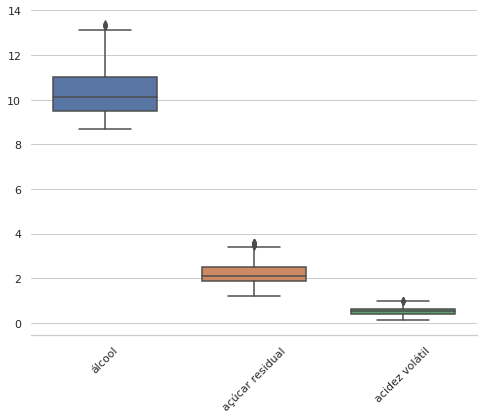

In [44]:
# Gráfico Boxplot: Vinho Branco

# set style
sns.set(style='whitegrid')

fig,ax = plt.subplots(1, figsize=(8,6))

ax = sns.boxplot(data=dadosTintoClean[[
                                  'alcohol',
                                  'residual sugar', 
                                  'volatile acidity'
                                ]], 
                                  width= .7
)

# title

# plt.title(
#             'Gáfico Boxplot: Vinho Tinto',
#             fontsize = 14
# )

# x-value labels

xvalues = ["álcool", "açúcar residual", "acidez volátil"]

plt.xticks(np.arange(3), xvalues)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# remove spines
sns.despine(
            top = True,
            right = True,
            left = True,
            bottom = False
)    

# set colors of boxplots

# palette = ['green', 'red', 'blue']
# color_dict = dict(zip(xvalues, palette))
# for i in range(0,3):
#   mybox = g.artists[i]
#   mybox.set_facecolor(color_dict[xvalues[i]])            

#plt.show()

plt.savefig(
              '/content/gdrive/MyDrive/projetoFinalMQ/figuras/bp3TintoClean.png',
              transparent = True,
              bbox_inches = 'tight'       
)

## Remoção de "Outliers": Vinho Branco

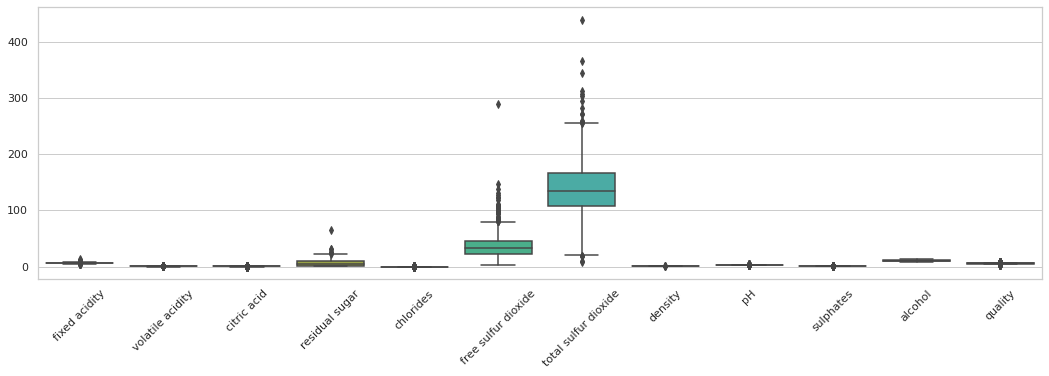

In [45]:
# Vinho tinto: panorama geral
sns.set(style='whitegrid')

fig,ax = plt.subplots(1, figsize=(18,5))

ax = sns.boxplot(data=dadosBranco)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# plt.title(
#             'Gáfico Boxplot: Vinho Branco',
#             fontsize = 14
# )

#plt.show()

plt.savefig(
              '/content/gdrive/MyDrive/projetoFinalMQ/figuras/bpGeralBranco.png',
              transparent = True,
              bbox_inches = 'tight'       
)

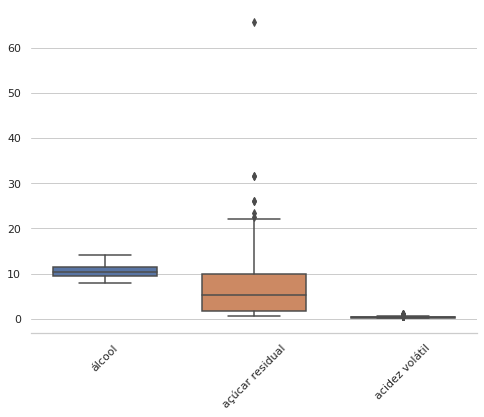

In [46]:
# Gáfico Boxplot: Vinho Tinto

# set style
sns.set(style='whitegrid')

fig,ax = plt.subplots(1, figsize=(8,6))

ax = sns.boxplot(data=dadosBranco[[
                                  'alcohol',
                                  'residual sugar', 
                                  'volatile acidity'
                                ]], 
                                  width= .7
)

# title

# plt.title(
#             'Gáfico Boxplot: Vinho Branco',
#             fontsize = 14
# )

# x-value labels

xvalues = ["álcool", "açúcar residual", "acidez volátil"]

plt.xticks(np.arange(3), xvalues)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# remove spines
sns.despine(
            top = True,
            right = True,
            left = True,
            bottom = False
)    

# set colors of boxplots

# palette = ['green', 'red', 'blue']
# color_dict = dict(zip(xvalues, palette))
# for i in range(0,3):
#   mybox = g.artists[i]
#   mybox.set_facecolor(color_dict[xvalues[i]])            

#plt.show()

plt.savefig(
              '/content/gdrive/MyDrive/projetoFinalMQ/figuras/bp3Branco.png',
              transparent = True,
              bbox_inches = 'tight'       
)

In [47]:
# create an empty list to store the output indices from multiple columns

index_list2 = []
for feature in [
                'alcohol', 
                'residual sugar', 
                'volatile acidity',
                'fixed acidity',
                'citric acid',
                'chlorides',
                'free sulfur dioxide',
                'total sulfur dioxide',
                'density',
                'pH',
                'sulphates'
                ]:
    index_list2.extend(outliers(dadosBranco, feature))

In [48]:
index_list2
gc.output.clear()

In [49]:
dadosBrancoClean = remove(dadosBranco, index_list2)

In [50]:
print('     dadosBranco: (Linhas, Colunas) =', dadosBranco.shape)

print('dadosBrancoClean: (Linhas, Colunas) =', dadosBrancoClean.shape)

     dadosBranco: (Linhas, Colunas) = (4898, 14)
dadosBrancoClean: (Linhas, Colunas) = (4015, 14)


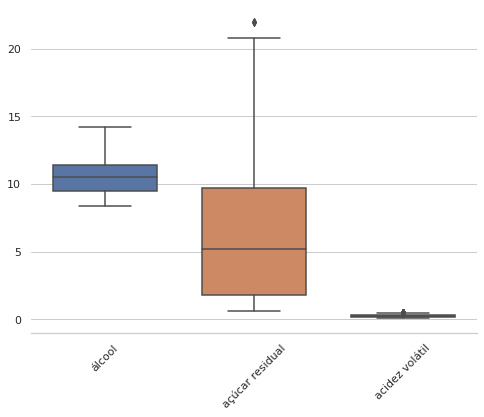

In [51]:
# Gráfico Boxplot: Vinho Branco

# set style
sns.set(style='whitegrid')

fig,ax = plt.subplots(1, figsize=(8,6))

ax = sns.boxplot(data=dadosBrancoClean[[
                                  'alcohol',
                                  'residual sugar', 
                                  'volatile acidity'
                                ]], 
                                  width= .7
)

# title

# plt.title(
#             'Gáfico Boxplot: Vinho Branco',
#             fontsize = 14
# )

# x-value labels

xvalues = ["álcool", "açúcar residual", "acidez volátil"]

plt.xticks(np.arange(3), xvalues)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# remove spines
sns.despine(
            top = True,
            right = True,
            left = True,
            bottom = False
)    

# set colors of boxplots

# palette = ['green', 'red', 'blue']
# color_dict = dict(zip(xvalues, palette))
# for i in range(0,3):
#   mybox = g.artists[i]
#   mybox.set_facecolor(color_dict[xvalues[i]])            

#plt.show()

plt.savefig(
              '/content/gdrive/MyDrive/projetoFinalMQ/figuras/bp3BrancoClean.png',
              transparent = True,
              bbox_inches = 'tight'       
)

In [52]:
# from google.colab import drive
# drive.mount('/content/drive')

## Distribuição Normal: Vinho Tinto

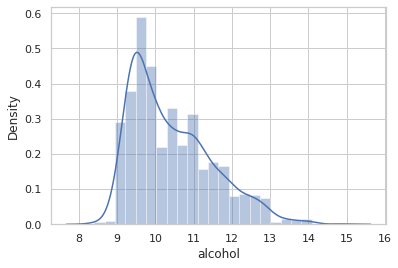

In [53]:
# Teor alcoólico com outliers
sns.distplot(dadosTinto['alcohol'])

plt.show()

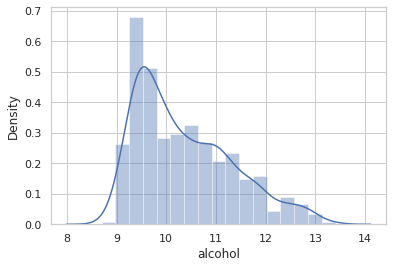

In [54]:
# Teor alcoólico sem outliers
sns.distplot(dadosTintoClean['alcohol'])

plt.show()

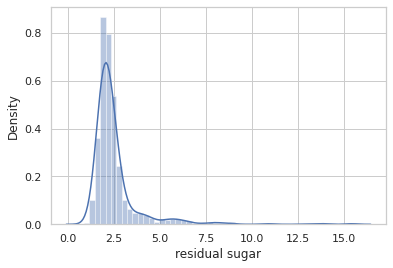

In [55]:
# Açúcar residual com outliers
sns.distplot(dadosTinto['residual sugar'])

plt.show()

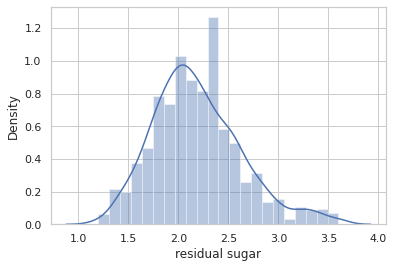

In [56]:
#açúcar residual sem outliers
sns.distplot(dadosTintoClean['residual sugar'])

plt.show()

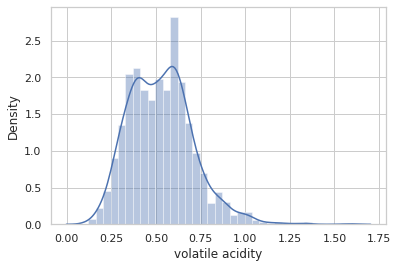

In [57]:
# Acidez volátil com outliers
sns.distplot(dadosTinto['volatile acidity'])

plt.show()

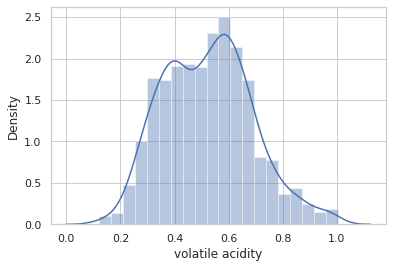

In [58]:
# Acidez volátil sem outliers
sns.distplot(dadosTintoClean['volatile acidity'])

plt.show()

## Distribuição Normal: Vinho Branco

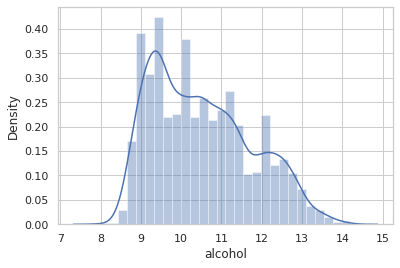

In [59]:
# Teor alcoólico com outliers
sns.distplot(dadosBranco['alcohol'])

plt.show()

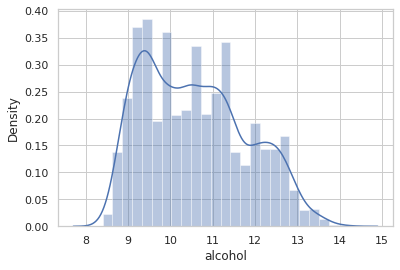

In [60]:
# Teor alcoólico sem outliers
sns.distplot(dadosBrancoClean['alcohol'])

plt.show()

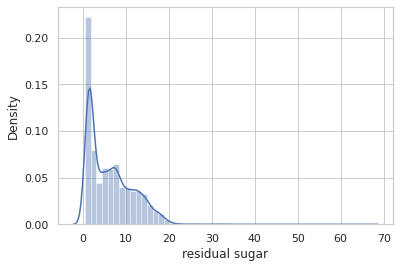

In [61]:
# Açúcar residual com outliers
sns.distplot(dadosBranco['residual sugar'])

plt.show()

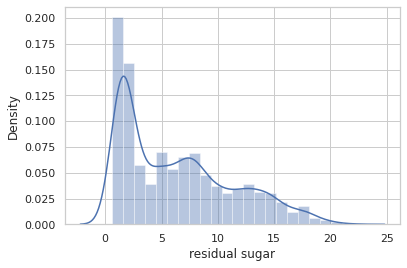

In [62]:
# Açúcar residual sem outliers
sns.distplot(dadosBrancoClean['residual sugar'])

plt.show()

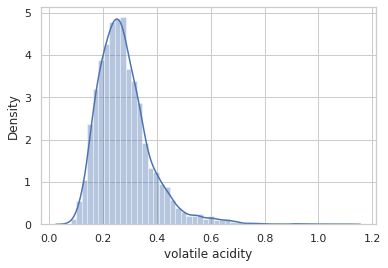

In [63]:
# Acidez volátil com outliers
sns.distplot(dadosBranco['volatile acidity'])

plt.show()

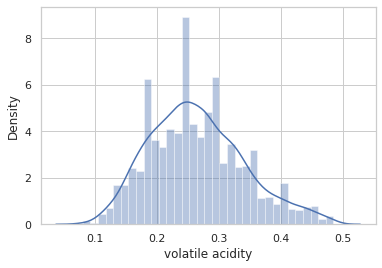

In [64]:
# Acidez volátil sem outliers
sns.distplot(dadosBrancoClean['volatile acidity'])

plt.show()

# Análise de Normalidade via teste de Shapiro-Wilk

# Vinho Tinto (dadosTintoClean)

## Teste de Shapiro-Wilk: Teor alcoólico

In [65]:
shapiro_stat, shapiro_p_valor = stats.shapiro(dadosTintoClean['alcohol'])

print("O valor da estatística de Shapiro-Wilk = " + str(shapiro_stat))

print("O valor de p de Shapiro-Wilk = " + str(shapiro_p_valor))

#Conclusão do teste
if shapiro_p_valor > 0.05:

  print("Com 95% de confiança, os dados são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!")

else:

  print("Com 95% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!")

O valor da estatística de Shapiro-Wilk = 0.9296357035636902
O valor de p de Shapiro-Wilk = 3.019555703528124e-23
Com 95% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!


## Teste de Shapiro-Wilk: Açúcar Residual

In [66]:
shapiro_stat, shapiro_p_valor = stats.shapiro(dadosTintoClean['residual sugar'])

print("O valor da estatística de Shapiro-Wilk = " + str(shapiro_stat))

print("O valor de p de Shapiro-Wilk = " + str(shapiro_p_valor))

#Conclusão do teste
if shapiro_p_valor > 0.05:

  print("Com 95% de confiança, os dados são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!")

else:

  print("Com 95% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!")

O valor da estatística de Shapiro-Wilk = 0.9711527228355408
O valor de p de Shapiro-Wilk = 1.0967557936868762e-14
Com 95% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!


## Teste de Shapiro-Wilk: Acidez Volátil

In [67]:
shapiro_stat, shapiro_p_valor = stats.shapiro(dadosTintoClean['volatile acidity'])

print("O valor da estatística de Shapiro-Wilk = " + str(shapiro_stat))

print("O valor de p de Shapiro-Wilk = " + str(shapiro_p_valor))

#Conclusão do teste
if shapiro_p_valor > 0.05:

  print("Com 95% de confiança, os dados são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!")

else:

  print("Com 95% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!")

O valor da estatística de Shapiro-Wilk = 0.9887820482254028
O valor de p de Shapiro-Wilk = 6.353872805675564e-08
Com 95% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!


# Vinho Branco (dadosBrancoClean)

## Teste de Shapiro-Wilk: Teor alcoólico

In [68]:
shapiro_stat, shapiro_p_valor = stats.shapiro(dadosBrancoClean['alcohol'])

print("O valor da estatística de Shapiro-Wilk = " + str(shapiro_stat))

print("O valor de p de Shapiro-Wilk = " + str(shapiro_p_valor))

#Conclusão do teste
if shapiro_p_valor > 0.05:

  print("Com 95% de confiança, os dados são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!")

else:

  print("Com 95% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!")

O valor da estatística de Shapiro-Wilk = 0.9615875482559204
O valor de p de Shapiro-Wilk = 2.242648089306688e-31
Com 95% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!


## Teste de Shapiro-Wilk: Açúcar Residual

In [69]:
shapiro_stat, shapiro_p_valor = stats.shapiro(dadosBrancoClean['residual sugar'])

print("O valor da estatística de Shapiro-Wilk = " + str(shapiro_stat))

print("O valor de p de Shapiro-Wilk = " + str(shapiro_p_valor))

#Conclusão do teste
if shapiro_p_valor > 0.05:

  print("Com 95% de confiança, os dados são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!")

else:

  print("Com 95% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!")

O valor da estatística de Shapiro-Wilk = 0.8980609774589539
O valor de p de Shapiro-Wilk = 1.401298464324817e-45
Com 95% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!


## Teste de Shapiro-Wilk: Acidez Volátil

In [70]:
shapiro_stat, shapiro_p_valor = stats.shapiro(dadosBrancoClean['volatile acidity'])

print("O valor da estatística de Shapiro-Wilk = " + str(shapiro_stat))

print("O valor de p de Shapiro-Wilk = " + str(shapiro_p_valor))

#Conclusão do teste
if shapiro_p_valor > 0.05:

  print("Com 95% de confiança, os dados são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!")

else:

  print("Com 95% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!")

O valor da estatística de Shapiro-Wilk = 0.9838126301765442
O valor de p de Shapiro-Wilk = 4.7689078732827445e-21
Com 95% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Shapiro-Wilk!


# Matriz de Correlação

## Vinho Tinto

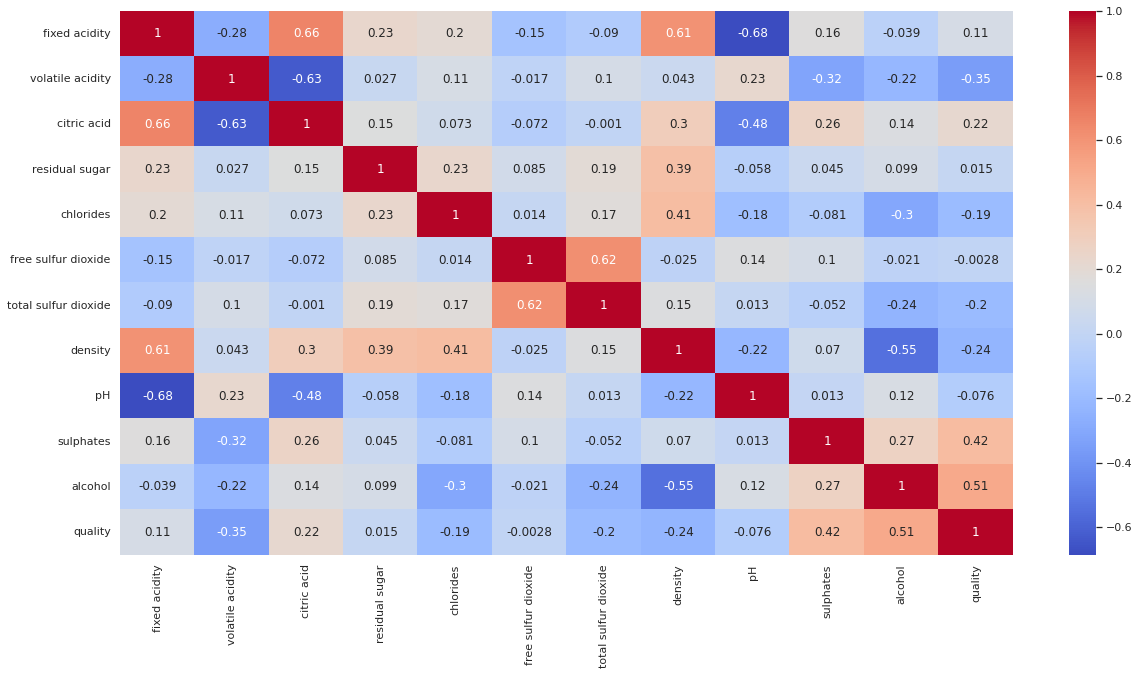

In [71]:
corr = dadosTintoClean.corr()

plt.figure(figsize = (20,10))

sns.heatmap(corr, annot = True, cmap = 'coolwarm')

plt.show()

# plt.savefig(
#               '/content/gdrive/MyDrive/projetoFinalMQ/figuras/corrTintoClean.png',
#               transparent = True,
#               bbox_inches = 'tight'       
# )

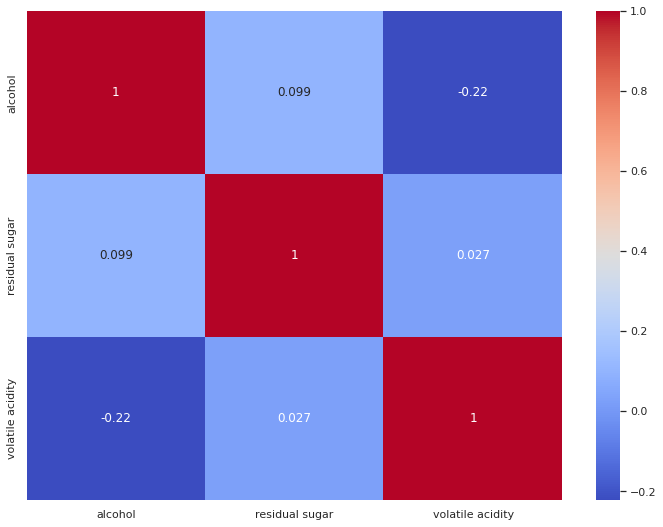

In [72]:
#Matriz de correlação de Pearson dadosTintoClean

corr = dadosTintoClean[['alcohol', 'residual sugar', 'volatile acidity']].corr()

plt.figure(figsize = (12,9))

sns.heatmap(corr, annot = True, cmap = 'coolwarm')

plt.show()

# plt.savefig(
#               '/content/gdrive/MyDrive/projetoFinalMQ/figuras/corr3TintoClean.png',
#               transparent = True,
#               bbox_inches = 'tight'       
# )

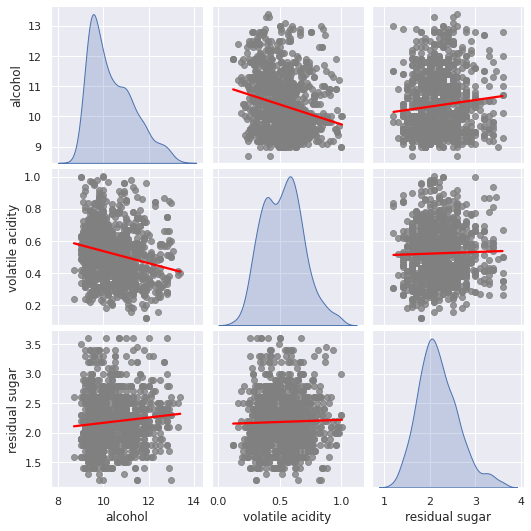

In [73]:
colunas = ['alcohol', 'volatile acidity', 'residual sugar']

sns.set_style('darkgrid')

pairplotTinto1 = sns.pairplot(
                              dadosTintoClean[colunas], 
                              diag_kind = 'kde', 
                              kind = 'reg',
                              plot_kws = {'ci': None, 'color':'red',
                                          'scatter_kws': {'color': 'gray'}
                                  
                                          }
)

# plt.savefig(
#               '/content/gdrive/MyDrive/projetoFinalMQ/figuras/pairplot3x3TintoClean.png',
#               transparent = True,
#               bbox_inches = 'tight'       
# )

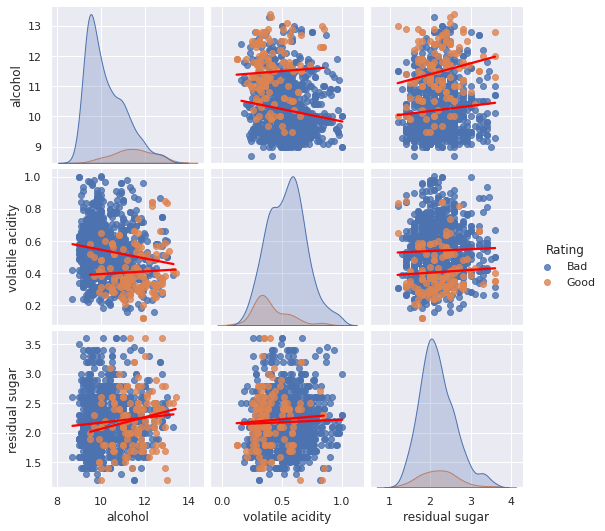

In [74]:
colunas = ['alcohol', 'volatile acidity', 'residual sugar']

colunas.append('Rating')

pairplotTinto2 = sns.pairplot(
                              dadosTintoClean[colunas], 
                              diag_kind = 'kde', 
                              kind = 'reg', 
                              hue = 'Rating',
                              plot_kws = {'ci': None,
                                          'line_kws':{'color':'red'}
                                          }
)

# plt.savefig(
#               '/content/gdrive/MyDrive/projetoFinalMQ/figuras/pairplotBomRuimTintoClean.png',
#               transparent = True,
#               bbox_inches = 'tight'       
# )

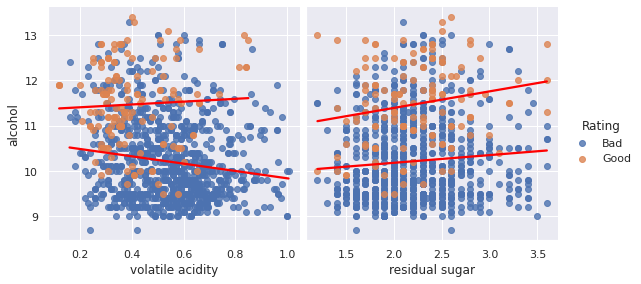

In [75]:
pairplotTinto3 = sns.pairplot(
                                dadosTintoClean[colunas],
                                hue = 'Rating',
                                y_vars = ['alcohol'],
                                x_vars = ['volatile acidity', 'residual sugar'],
                                kind = 'reg',
                                height = 4,
                                plot_kws = {'ci': None,'line_kws':{'color':'red'}}
)

# plt.savefig(
#               '/content/gdrive/MyDrive/projetoFinalMQ/figuras/pairplot2x2BomRuimTintoClean.png',
#               transparent = True,
#               bbox_inches = 'tight'       
# )

## Vinho Branco

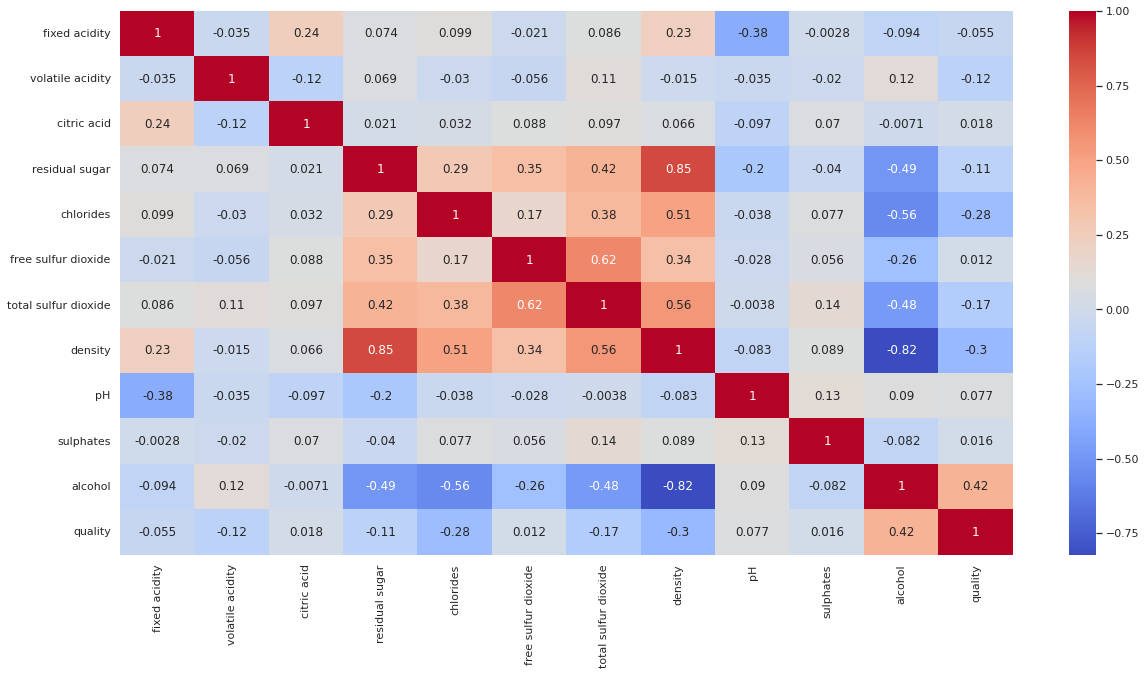

In [76]:
corr = dadosBrancoClean.corr()

plt.figure(figsize = (20,10))

sns.heatmap(corr, annot = True, cmap = 'coolwarm')

plt.show()

# plt.savefig(
#               '/content/gdrive/MyDrive/projetoFinalMQ/figuras/corrBrancoClean.png',
#               transparent = True,
#               bbox_inches = 'tight'       
# )

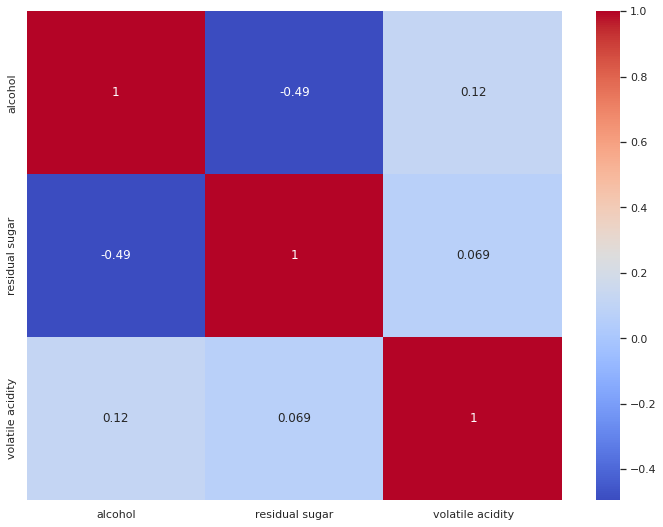

In [77]:
#Matriz de correlação de Pearson dadosBrancoClean

corr2 = dadosBrancoClean[['alcohol', 'residual sugar', 'volatile acidity']].corr()

plt.figure(figsize = (12,9))

sns.heatmap(corr2, annot = True, cmap = 'coolwarm')

plt.show()

# plt.savefig(
#               '/content/gdrive/MyDrive/projetoFinalMQ/figuras/corr3BrancoClean.png',
#               transparent = True,
#               bbox_inches = 'tight'       
# )

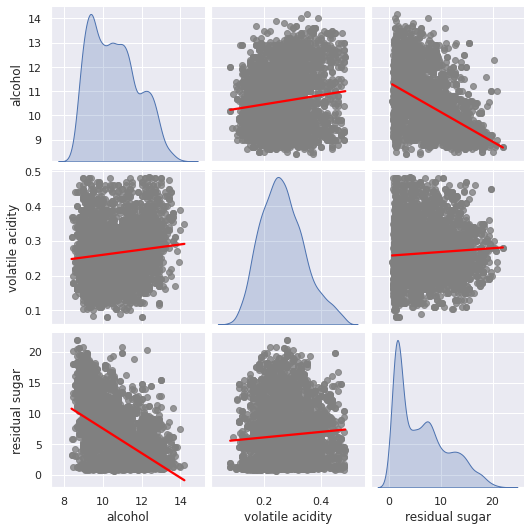

In [78]:
colunas = ['alcohol', 'volatile acidity', 'residual sugar']

sns.set_style('darkgrid')

pairplotBranco1 = sns.pairplot(
                                dadosBrancoClean[colunas], 
                                diag_kind = 'kde', 
                                kind = 'reg',
                                plot_kws = {'ci': None, 'color':'red',
                                            'scatter_kws': {'color': 'gray'}
                                    
                                            }
)

# plt.savefig(
#               '/content/gdrive/MyDrive/projetoFinalMQ/figuras/pairplot3x3BrancoClean.png',
#               transparent = True,
#               bbox_inches = 'tight'       
# )

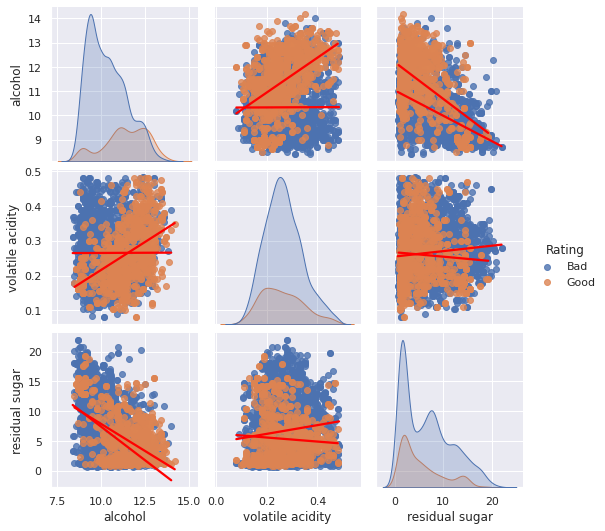

In [79]:
colunas = ['alcohol', 'volatile acidity', 'residual sugar']

colunas.append('Rating')

pairplotBranco2 = sns.pairplot(
                                dadosBrancoClean[colunas], 
                                diag_kind = 'kde', 
                                kind = 'reg', 
                                hue = 'Rating',
                                plot_kws = {'ci': None,
                                            'line_kws':{'color':'red'}
                                            }
)

# plt.savefig(
#               '/content/gdrive/MyDrive/projetoFinalMQ/figuras/pairplotBomRuimBrancoClean.png',
#               transparent = True,
#               bbox_inches = 'tight'       
# )

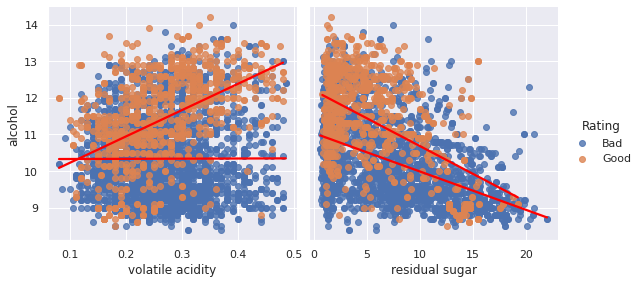

In [80]:
colunas = ['alcohol', 'volatile acidity', 'residual sugar']

colunas.append('Rating')

pairplotBranco3 = sns.pairplot(
                                dadosBrancoClean[colunas],
                                hue = 'Rating',
                                y_vars = ['alcohol'],
                                x_vars = ['volatile acidity', 'residual sugar'],
                                kind = 'reg',
                                height = 4,
                                plot_kws = {'ci': None,
                                            'line_kws':{'color':'red'}
                                            }
)

# plt.savefig(
#               '/content/gdrive/MyDrive/projetoFinalMQ/figuras/pairplot2x2BomRuimBrancoClean.png',
#               transparent = True,
#               bbox_inches = 'tight'       
# )

# Dados não paramétricos - Teste U de Mann-Whitney (medianas)

##Há uma diferença estatisticamente significante entre as medianas de ...?

In [81]:
pivotUnificada2 = pd.pivot_table(
                        dadosUnificados, 
                        index = 'Type',
                        values = [
                                  'volatile acidity',
                                  'alcohol', 
                                  'residual sugar'
                               ],
                        columns = 'Rating',
                        aggfunc='median'
)

pivotUnificada2

alcohol       residual sugar        volatile acidity      
Rating     Bad  Good            Bad   Good              Bad  Good
Type                                                             
Red       10.0  11.6            2.2  2.300             0.54  0.37
White     10.0  11.5            6.0  3.875             0.27  0.25

In [82]:
# Exportação do banco de dados 
# pivotUnificada2.to_csv('./pivotUnificada2.csv')

In [83]:
from scipy.stats import mannwhitneyu
#Or
#from pingouin import mwu
#mwu(df['X'], df['Y'], tail='one-sided')

## Codificação dos dfs

R = tinto,
W = branco,
A = álcool,
V = acidez volátil,
R = açúcar residual,
G = bom,
B = ruim.



# Acidez Volátil - Tinto vs Branco

##Tinto BOM vs Tinto RUIM

In [84]:
#Codificação dos dataframes (df)
#R = tinto, W = branco, A = álcool, V = acidez volátil, R = açúcar residual, G = bom, B = ruim

#dfRVG
filterCriteria1 = (dadosTinto['Rating'] == 'Good') | (dadosTinto['volatile acidity'])
#dfRVB
filterCriteria2 = (dadosTinto['Rating'] == 'Bad') | (dadosTinto['volatile acidity'])

dfRVG = dadosTinto[filterCriteria1]

dfRVB = dadosTinto[filterCriteria2]

#mannwhitneyu(dfRVG['volatile acidity'], dfRVG['volatile acidity'])

mannwhitneyu_stat, mannwhitneyu_p_valor = stats.mannwhitneyu(dfRVG['volatile acidity'], dfRVG['volatile acidity'])

print("O valor da estatística de Mann-Whitney = " + str(mannwhitneyu_stat))

print("O valor de p de Mann-Whitney = " + str(mannwhitneyu_p_valor))

#Conclusão do teste
if mannwhitneyu_p_valor > 0.05:

  print("Com 95% de confiança, NÃO há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!")

else:

  print("Com 95% de confiança, há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!")

O valor da estatística de Mann-Whitney = 1278400.5
O valor de p de Mann-Whitney = 0.49999235848324214
Com 95% de confiança, NÃO há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!


##Branco BOM vs Branco RUIM

In [85]:
#dfWVG
filterCriteria3 = (dadosBranco['Rating'] == 'Good') | (dadosBranco['volatile acidity'])
#dfWVB
filterCriteria4 = (dadosBranco['Rating'] == 'Bad') | (dadosBranco['volatile acidity'])

dfWVG = dadosBranco[filterCriteria3]

dfWVB = dadosBranco[filterCriteria4]

#mannwhitneyu(dfWVG['volatile acidity'], dfWVG['volatile acidity'])

mannwhitneyu_stat, mannwhitneyu_p_valor = stats.mannwhitneyu(dfWVG['volatile acidity'], dfWVG['volatile acidity'])

print("O valor da estatística de Mann-Whitney = " + str(mannwhitneyu_stat))

print("O valor de p de Mann-Whitney = " + str(mannwhitneyu_p_valor))

#Conclusão do teste
if mannwhitneyu_p_valor > 0.05:

  print("Com 95% de confiança, NÃO há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!")

else:

  print("Com 95% de confiança, há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!")

O valor da estatística de Mann-Whitney = 11995202.0
O valor de p de Mann-Whitney = 0.49999857375679796
Com 95% de confiança, NÃO há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!


#Açúcar Residual - Tinto vs Branco

##Tinto BOM vs Tinto RUIM

In [86]:
#dfRRG
filterCriteria5 = (dadosTinto['Rating'] == 'Good') | (dadosTinto['residual sugar'])
#dfRRB
filterCriteria6 = (dadosTinto['Rating'] == 'Bad') | (dadosTinto['residual sugar'])

dfRRG = dadosTinto[filterCriteria5]

dfRRB = dadosTinto[filterCriteria6]

#mannwhitneyu(dfRRG['volatile acidity'], dfRRG['volatile acidity'])

mannwhitneyu_stat, mannwhitneyu_p_valor = stats.mannwhitneyu(dfRRG['volatile acidity'], dfRRG['volatile acidity'])

print("O valor da estatística de Mann-Whitney = " + str(mannwhitneyu_stat))

print("O valor de p de Mann-Whitney = " + str(mannwhitneyu_p_valor))

#Conclusão do teste
if mannwhitneyu_p_valor > 0.05:

  print("Com 95% de confiança, NÃO há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!")

else:

  print("Com 95% de confiança, há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!")

O valor da estatística de Mann-Whitney = 1278400.5
O valor de p de Mann-Whitney = 0.49999235848324214
Com 95% de confiança, NÃO há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!


##Branco BOM vs Branco RUIM

In [87]:
#dfWRG
filterCriteria7 = (dadosBranco['Rating'] == 'Good') | (dadosBranco['residual sugar'])
#dfWRB
filterCriteria8 = (dadosBranco['Rating'] == 'Bad') | (dadosBranco['residual sugar'])

dfWRG = dadosBranco[filterCriteria7]

dfWRB = dadosBranco[filterCriteria8]

#mannwhitneyu(dfWRG['residual sugar'], dfWRG['residual sugar'])

mannwhitneyu_stat, mannwhitneyu_p_valor = stats.mannwhitneyu(dfWRG['residual sugar'], dfWRG['residual sugar'])

print("O valor da estatística de Mann-Whitney = " + str(mannwhitneyu_stat))

print("O valor de p de Mann-Whitney = " + str(mannwhitneyu_p_valor))

#Conclusão do teste
if mannwhitneyu_p_valor > 0.05:

  print("Com 95% de confiança, NÃO há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!")

else:

  print("Com 95% de confiança, há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!")

O valor da estatística de Mann-Whitney = 11995202.0
O valor de p de Mann-Whitney = 0.49999857450670243
Com 95% de confiança, NÃO há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!


# Teor alcoólico - Tinto vs Branco

##Tinto BOM vs Tinto RUIM

In [88]:
#dfRAG
filterCriteria9 = (dadosTinto['Rating'] == 'Good') | (dadosTinto['alcohol'])
#dfRAB
filterCriteria10 = (dadosTinto['Rating'] == 'Bad') | (dadosTinto['alcohol'])

dfRAG = dadosTinto[filterCriteria9]

dfRAB = dadosTinto[filterCriteria10]

#mannwhitneyu(dfRAG['alcohol'], dfRAG['alcohol'])

mannwhitneyu_stat, mannwhitneyu_p_valor = stats.mannwhitneyu(dfRAG['alcohol'], dfRAG['alcohol'])

print("O valor da estatística de Mann-Whitney = " + str(mannwhitneyu_stat))

print("O valor de p de Mann-Whitney = " + str(mannwhitneyu_p_valor))

#Conclusão do teste
if mannwhitneyu_p_valor > 0.05:

  print("Com 95% de confiança, NÃO há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!")

else:

  print("Com 95% de confiança, há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!")

O valor da estatística de Mann-Whitney = 1278400.5
O valor de p de Mann-Whitney = 0.49999235312650697
Com 95% de confiança, NÃO há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!


##Branco BOM vs Branco RUIM

In [89]:
#dfWAG
filterCriteria11 = (dadosBranco['Rating'] == 'Good') | (dadosBranco['alcohol'])
#dfWAB
filterCriteria12 = (dadosBranco['Rating'] == 'Bad') | (dadosBranco['alcohol'])

dfWAG = dadosBranco[filterCriteria11]

dfWAB = dadosBranco[filterCriteria12]

# mannwhitneyu(dfWAG['alcohol'], dfWAG['alcohol'])

mannwhitneyu_stat, mannwhitneyu_p_valor = stats.mannwhitneyu(dfWAG['alcohol'], dfWAG['alcohol'])

print("O valor da estatística de Mann-Whitney = " + str(mannwhitneyu_stat))

print("O valor de p de Mann-Whitney = " + str(mannwhitneyu_p_valor))

#Conclusão do teste
if mannwhitneyu_p_valor > 0.05:

  print("Com 95% de confiança, NÃO há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!")

else:

  print("Com 95% de confiança, há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!")

O valor da estatística de Mann-Whitney = 11995202.0
O valor de p de Mann-Whitney = 0.4999985741656666
Com 95% de confiança, NÃO há diferença estatisticamente significante entre as medianas segundo o teste U de Mann-Whitney!
